# Polynomial Regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures


In [7]:
X = 6 * np.random.rand(100,1) - 3
y = 0.5*X**2 + 1.5*X + 2 + np.random.rand(100,1)

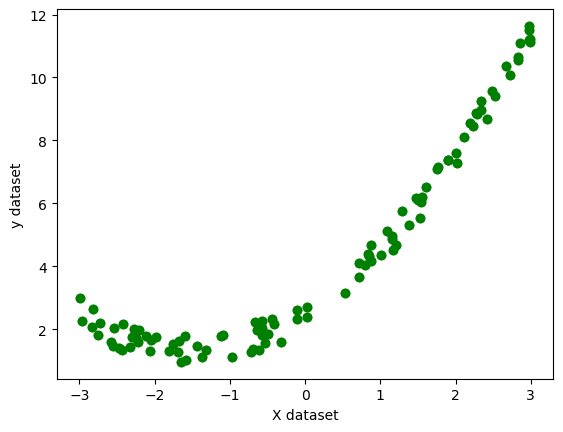

In [17]:
plt.scatter(X,y,color = 'g')
plt.xlabel('X dataset')
plt.ylabel('y dataset')
plt.show()

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [25]:
regression_1 = LinearRegression()

In [27]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [29]:
score = r2_score(y_test,regression_1.predict(X_test))
print(score)

0.8340926440586895


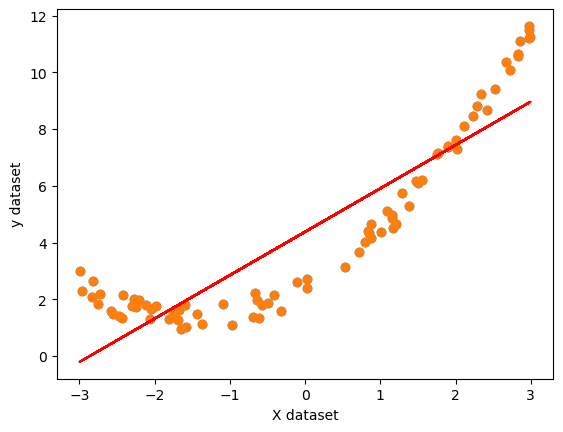

In [33]:
plt.plot(X_train,regression_1.predict(X_train),color = 'r')
plt.scatter(X_train,y_train)
plt.xlabel("X dataset")
plt.ylabel("y dataset")
plt.show()

In [35]:
poly = PolynomialFeatures(degree=2,include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [42]:
regression = LinearRegression()
regression.fit(X_train_poly,y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.9925641980081192


In [44]:
print(regression.coef_)

[[0.         1.51859203 0.4971617 ]]


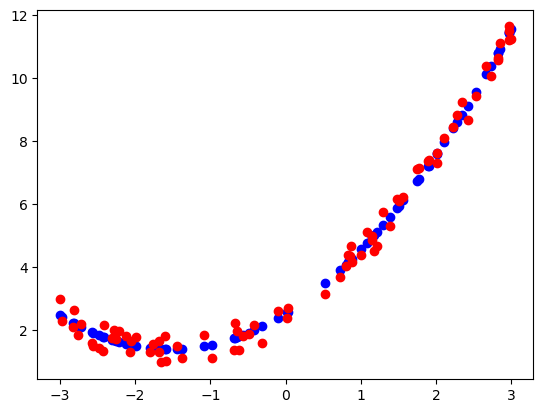

In [52]:
plt.scatter(X_train,regression.predict(X_train_poly),color = 'b')
plt.scatter(X_train,y_train,color='r')
plt.show()

In [54]:
poly2 = PolynomialFeatures(degree=3,include_bias=True)
X_train_poly2 = poly.fit_transform(X_train)
X_test_poly2 = poly.transform(X_test)

In [58]:
regression2 = LinearRegression()
regression2.fit(X_train_poly2,y_train)
y_pred2 = regression2.predict(X_test_poly2)
score2 = r2_score(y_test,y_pred2)
print(score2)

0.9925641980081192


In [60]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00],
       [ 1.00000000e+00, -2.63819095e+00,  6.96005151e+00],
       [ 1.00000000e+00, -2.60804020e+00,  6.80187369e+00],
       [ 1.00000000e+00, -2.57788945e+00,  6.64551400e+00],
       [ 1.00000000e+00, -2.54773869e+00,  6.49097245e+00],
       [ 1.00000000e+00, -2.51758794e+00

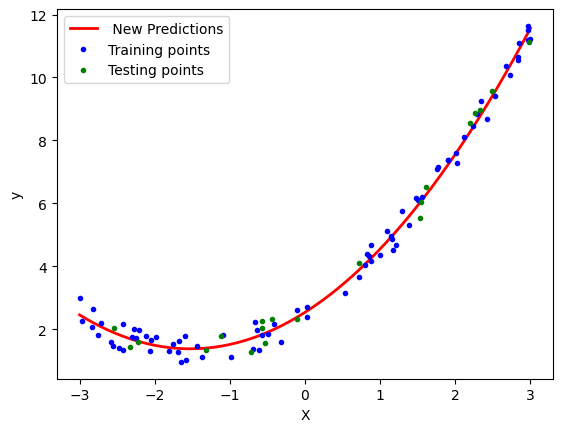

In [62]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Pipeline concept

In [67]:
from sklearn.pipeline import Pipeline

In [69]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

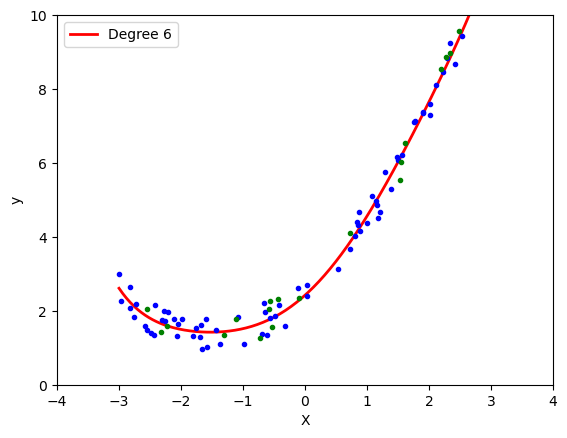

In [87]:
poly_regression(6)